# Comparing metrics

In [ ]:
import pandas as pd
import numpy as np
!pip install pyreadr
import pyreadr
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os
import statsmodels.api as sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 2.7 MB/s eta 0:00:00


## Data processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

filename = '/content/drive/MyDrive/Colab_Notebooks/pickles1/song_data.rds'
# Read the data
data = pyreadr.read_r(filename)
data = data[None]
data['release_year'] = pd.to_datetime(data['release_date']).dt.year
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        song_id   tag release_date  release_month  release_year  listen_times  \
0     v4hT2a13e   pop   1994-04-10    1994.250000          1994       18775.0   
1   xNgVaKafcd0   pop   2017-09-08    2017.666667          2017         952.0   
2   mSOdaq656ff  rock   2015-11-11    2015.833333          2015         601.0   
3  bqv5oMs3aac9   pop   2016-05-24    2016.333333          2016         425.0   
4   xLBr1fbf8ac   pop   2015-06-27    2015.416667          2015       42450.0   

   chroma_stft_norm  rmse_norm  spectral_centroid_norm  \
0          0.318874   0.128482                0.235004   
1          0.313235   0.226911                0.325286   
2          0.553648   0.305978                0.255246   
3          0.317953   0.153784                0.248175   
4          0.295309   0.174921                0.247695   

   spectral_bandwidth_norm  ...  mf

In [ ]:
# Display number of songs of each genre and its proportion
data_genres_composition = data.where(data['release_year'].isin([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]))
data_genres_composition = data_genres_composition.dropna(how='all')
data_genres_composition = data_genres_composition.groupby(['release_year', 'tag']).size().unstack().reset_index().astype(int)
visu_data = data_genres_composition.copy()
data_genres_composition['sum'] = data_genres_composition['folk'] + data_genres_composition['hiphop'] + data_genres_composition['pop'] + data_genres_composition['rock']
data_genres_composition['folk_prop'] = data_genres_composition['folk'] / data_genres_composition['sum']
data_genres_composition['hiphop_prop'] = data_genres_composition['hiphop'] / data_genres_composition['sum']
data_genres_composition['pop_prop'] = data_genres_composition['pop'] / data_genres_composition['sum']
data_genres_composition['rock_prop'] = data_genres_composition['rock'] / data_genres_composition['sum']
display(data_genres_composition)

tag,release_year,folk,hiphop,pop,rock,sum,folk_prop,hiphop_prop,pop_prop,rock_prop
0,2009,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923
1,2010,140,137,1079,227,1583,0.088440,0.086545,0.681617,0.143399
2,2011,279,113,1023,415,1830,0.152459,0.061749,0.559016,0.226776
3,2012,289,271,1251,473,2284,0.126532,0.118651,0.547723,0.207093
4,2013,438,314,1660,564,2976,0.147177,0.105511,0.557796,0.189516
5,2014,802,804,2432,1211,5249,0.152791,0.153172,0.463326,0.230711
6,2015,1297,918,2882,1687,6784,0.191185,0.135318,0.424823,0.248673
7,2016,1072,849,3908,1447,7276,0.147334,0.116685,0.537108,0.198873
8,2017,1775,2365,6497,2203,12840,0.138240,0.184190,0.505997,0.171573
9,2018,1902,3636,9687,1940,17165,0.110807,0.211826,0.564346,0.113021


In [ ]:
# Display song proportions of each genre in GTZAN dataset
data_genres_composition_GTZAN = data.where(data['release_year'].isin([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]) & (data['tag'] != "folk"))
data_genres_composition_GTZAN = data_genres_composition_GTZAN.dropna(how='all')
data_genres_composition_GTZAN = data_genres_composition_GTZAN.groupby(['release_year', 'tag']).size().unstack().reset_index().astype(int)

data_genres_composition_GTZAN['sum'] = data_genres_composition_GTZAN['hiphop'] + data_genres_composition_GTZAN['pop'] + data_genres_composition_GTZAN['rock']
data_genres_composition_GTZAN['hiphop_prop_GTZAN'] = data_genres_composition_GTZAN['hiphop'] / data_genres_composition_GTZAN['sum']
data_genres_composition_GTZAN['pop_prop_GTZAN'] = data_genres_composition_GTZAN['pop'] / data_genres_composition_GTZAN['sum']
data_genres_composition_GTZAN['rock_prop_GTZAN'] = data_genres_composition_GTZAN['rock'] / data_genres_composition_GTZAN['sum']

data_genres_composition_GTZAN = data_genres_composition_GTZAN.reset_index().loc[:, ['release_year', 'hiphop_prop_GTZAN', 'pop_prop_GTZAN', 'rock_prop_GTZAN']]
print(data_genres_composition_GTZAN)

tag  release_year  hiphop_prop_GTZAN  pop_prop_GTZAN  rock_prop_GTZAN
0            2009           0.044226        0.788698         0.167076
1            2010           0.094941        0.747748         0.157311
2            2011           0.072856        0.659574         0.267569
3            2012           0.135840        0.627068         0.237093
4            2013           0.123719        0.654058         0.222222
5            2014           0.180796        0.546886         0.272318
6            2015           0.167305        0.525241         0.307454
7            2016           0.136847        0.629916         0.233237
8            2017           0.213737        0.587167         0.199096
9            2018           0.238223        0.634672         0.127105
10           2019           0.258040        0.600088         0.141873


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load metrics data
dir_name = '/content/drive/MyDrive/Colab_Notebooks/pickles1'
# dir_name = 'pickles'
filenames = [os.path.join(dir_name,filename) for filename in os.listdir(dir_name) if "_metrics_" in filename]
read_list = [pd.read_pickle(filename) for filename in filenames]
merge = pd.concat(read_list, keys=[filename.split('/')[-1].replace('.pkl', '') for filename in filenames], names=['src']).reset_index()

In [ ]:
display(merge)

,src,level_1,release_year,treatment_year,metrics,values
0,classifiers_metrics_gtzan,0,2009,1,classifiers_pred_acc,0.160319
1,classifiers_metrics_gtzan,1,2010,1,classifiers_pred_acc,0.190748
2,classifiers_metrics_gtzan,2,2011,1,classifiers_pred_acc,0.261283
3,classifiers_metrics_gtzan,3,2012,1,classifiers_pred_acc,0.226817
4,classifiers_metrics_gtzan,4,2013,1,classifiers_pred_acc,0.216805
...,...,...,...,...,...,...
655,rf_metrics_2018,39,2015,1,rf_precision,0.450000
656,rf_metrics_2018,40,2016,1,rf_precision,0.366464
657,rf_metrics_2018,41,2017,0,rf_precision,0.577295
658,rf_metrics_2018,42,2018,0,rf_precision,0.718991


In [ ]:
merge = (
    merge
    .assign(classifier=lambda x: x['src'].str.extract(r'(^[a-z]{2,})_.*$'),
            data=lambda x: x['src'].str.extract(r'^.*_metrics_(.*)$'))
    .merge(data_genres_composition, on='release_year', how='right')
    .merge(data_genres_composition_GTZAN, on='release_year', how='right')
)
display(merge)

,src,level_1,release_year,treatment_year,metrics,values,classifier,data,folk,hiphop,pop,rock,sum,folk_prop,hiphop_prop,pop_prop,rock_prop,hiphop_prop_GTZAN,pop_prop_GTZAN,rock_prop_GTZAN
0,classifiers_metrics_gtzan,0,2009,1,classifiers_pred_acc,0.160319,classifiers,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
1,classifiers_metrics_gtzan,11,2009,1,classifiers_pred_bin_acc,0.236486,classifiers,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
2,classifiers_metrics_gtzan,22,2009,1,classifiers_recall,0.421296,classifiers,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
3,classifiers_metrics_gtzan,33,2009,1,classifiers_precision,0.095266,classifiers,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
4,gnb_metrics_gtzan,0,2009,1,gnb_pred_acc,0.162981,gnb,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,gnb_metrics_2018,43,2019,0,gnb_precision,0.450051,gnb,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
656,rf_metrics_2018,10,2019,0,rf_pred_acc,0.488648,rf,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
657,rf_metrics_2018,21,2019,0,rf_pred_bin_acc,0.383290,rf,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
658,rf_metrics_2018,32,2019,0,rf_recall,0.783807,rf,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873


In [ ]:
filtered_data = merge[
    (merge['release_year'] != 2009) &
    (merge['metrics'].str.contains('mean_pred_bin_acc|recall')) &
    (~merge['metrics'].str.contains('trap'))
]
display(filtered_data)
# filtered_data = filtered_data.groupby(['src', 'metrics']).size().unstack().reset_index()
# display(filtered_data)

res = sm.OLS(filtered_data['values'], sm.add_constant(filtered_data[['release_year', 'values']])).fit()

result = pd.DataFrame({
    'est_year':   [res.params[1]],
    'sd_year':    [res.bse[1]],
    'pval_year':  [res.pvalues[1]],
    'est_year2':  [res.params[2]],
    'sd_year2':   [res.bse[2]],
    'pval_year2': [res.pvalues[2]],
    'r2':         [res.rsquared]
    })

result = result.reset_index().loc[:, ['pval_year', 'pval_year2']]

display(result)

,src,level_1,release_year,treatment_year,metrics,values,classifier,data,folk,hiphop,pop,rock,sum,folk_prop,hiphop_prop,pop_prop,rock_prop,hiphop_prop_GTZAN,pop_prop_GTZAN,rock_prop_GTZAN
62,classifiers_metrics_gtzan,23,2010,1,classifiers_recall,0.436131,classifiers,gtzan,140,137,1079,227,1583,0.088440,0.086545,0.681617,0.143399,0.094941,0.747748,0.157311
66,gnb_metrics_gtzan,23,2010,1,gnb_recall,0.437956,gnb,gtzan,140,137,1079,227,1583,0.088440,0.086545,0.681617,0.143399,0.094941,0.747748,0.157311
70,knn_metrics_gtzan,23,2010,1,knn_recall,0.693431,knn,gtzan,140,137,1079,227,1583,0.088440,0.086545,0.681617,0.143399,0.094941,0.747748,0.157311
74,rf_metrics_gtzan,23,2010,1,rf_recall,0.576642,rf,gtzan,140,137,1079,227,1583,0.088440,0.086545,0.681617,0.143399,0.094941,0.747748,0.157311
78,xgb_metrics_gtzan,23,2010,1,xgb_recall,0.036496,xgb,gtzan,140,137,1079,227,1583,0.088440,0.086545,0.681617,0.143399,0.094941,0.747748,0.157311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,knn_metrics_2018,32,2019,0,knn_recall,0.735057,knn,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
646,rf_metrics_2009,32,2019,0,rf_recall,0.620602,rf,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
650,classifiers_metrics_2009,32,2019,0,classifiers_recall,0.370920,classifiers,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
654,gnb_metrics_2018,32,2019,0,gnb_recall,0.744807,gnb,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873


,pval_year,pval_year2
0,0.950946,0.0


## Visualize: Mean Prediction Hip-Hop Binary & Recall

,src,level_1,release_year,treatment_year,metrics,values,classifier,data,folk,hiphop,pop,rock,sum,folk_prop,hiphop_prop,pop_prop,rock_prop,hiphop_prop_GTZAN,pop_prop_GTZAN,rock_prop_GTZAN
1,classifiers_metrics_gtzan,11,2009,1,classifiers_pred_bin_acc,0.236486,classifiers,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
5,gnb_metrics_gtzan,11,2009,1,gnb_pred_bin_acc,0.703522,gnb,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
9,knn_metrics_gtzan,11,2009,1,knn_pred_bin_acc,0.087633,knn,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
13,rf_metrics_gtzan,11,2009,1,rf_pred_bin_acc,0.139230,rf,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
17,xgb_metrics_gtzan,11,2009,1,xgb_pred_bin_acc,0.015561,xgb,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,knn_metrics_2018,21,2019,0,knn_pred_bin_acc,0.392153,knn,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
645,rf_metrics_2009,21,2019,0,rf_pred_bin_acc,0.791874,rf,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
649,classifiers_metrics_2009,21,2019,0,classifiers_pred_bin_acc,0.727694,classifiers,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
653,gnb_metrics_2018,21,2019,0,gnb_pred_bin_acc,0.268572,gnb,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873


,src,level_1,release_year,treatment_year,metrics,values,classifier,data,folk,hiphop,pop,rock,sum,folk_prop,hiphop_prop,pop_prop,rock_prop,hiphop_prop_GTZAN,pop_prop_GTZAN,rock_prop_GTZAN
1,classifiers_metrics_gtzan,11,2009,1,classifiers_pred_bin_acc,0.236486,classifiers,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
5,gnb_metrics_gtzan,11,2009,1,gnb_pred_bin_acc,0.703522,gnb,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
9,knn_metrics_gtzan,11,2009,1,knn_pred_bin_acc,0.087633,knn,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
13,rf_metrics_gtzan,11,2009,1,rf_pred_bin_acc,0.139230,rf,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
17,xgb_metrics_gtzan,11,2009,1,xgb_pred_bin_acc,0.015561,xgb,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,knn_metrics_2018,21,2019,0,knn_pred_bin_acc,0.392153,knn,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
645,rf_metrics_2009,21,2019,0,rf_pred_bin_acc,0.791874,rf,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
649,classifiers_metrics_2009,21,2019,0,classifiers_pred_bin_acc,0.727694,classifiers,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
653,gnb_metrics_2018,21,2019,0,gnb_pred_bin_acc,0.268572,gnb,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873


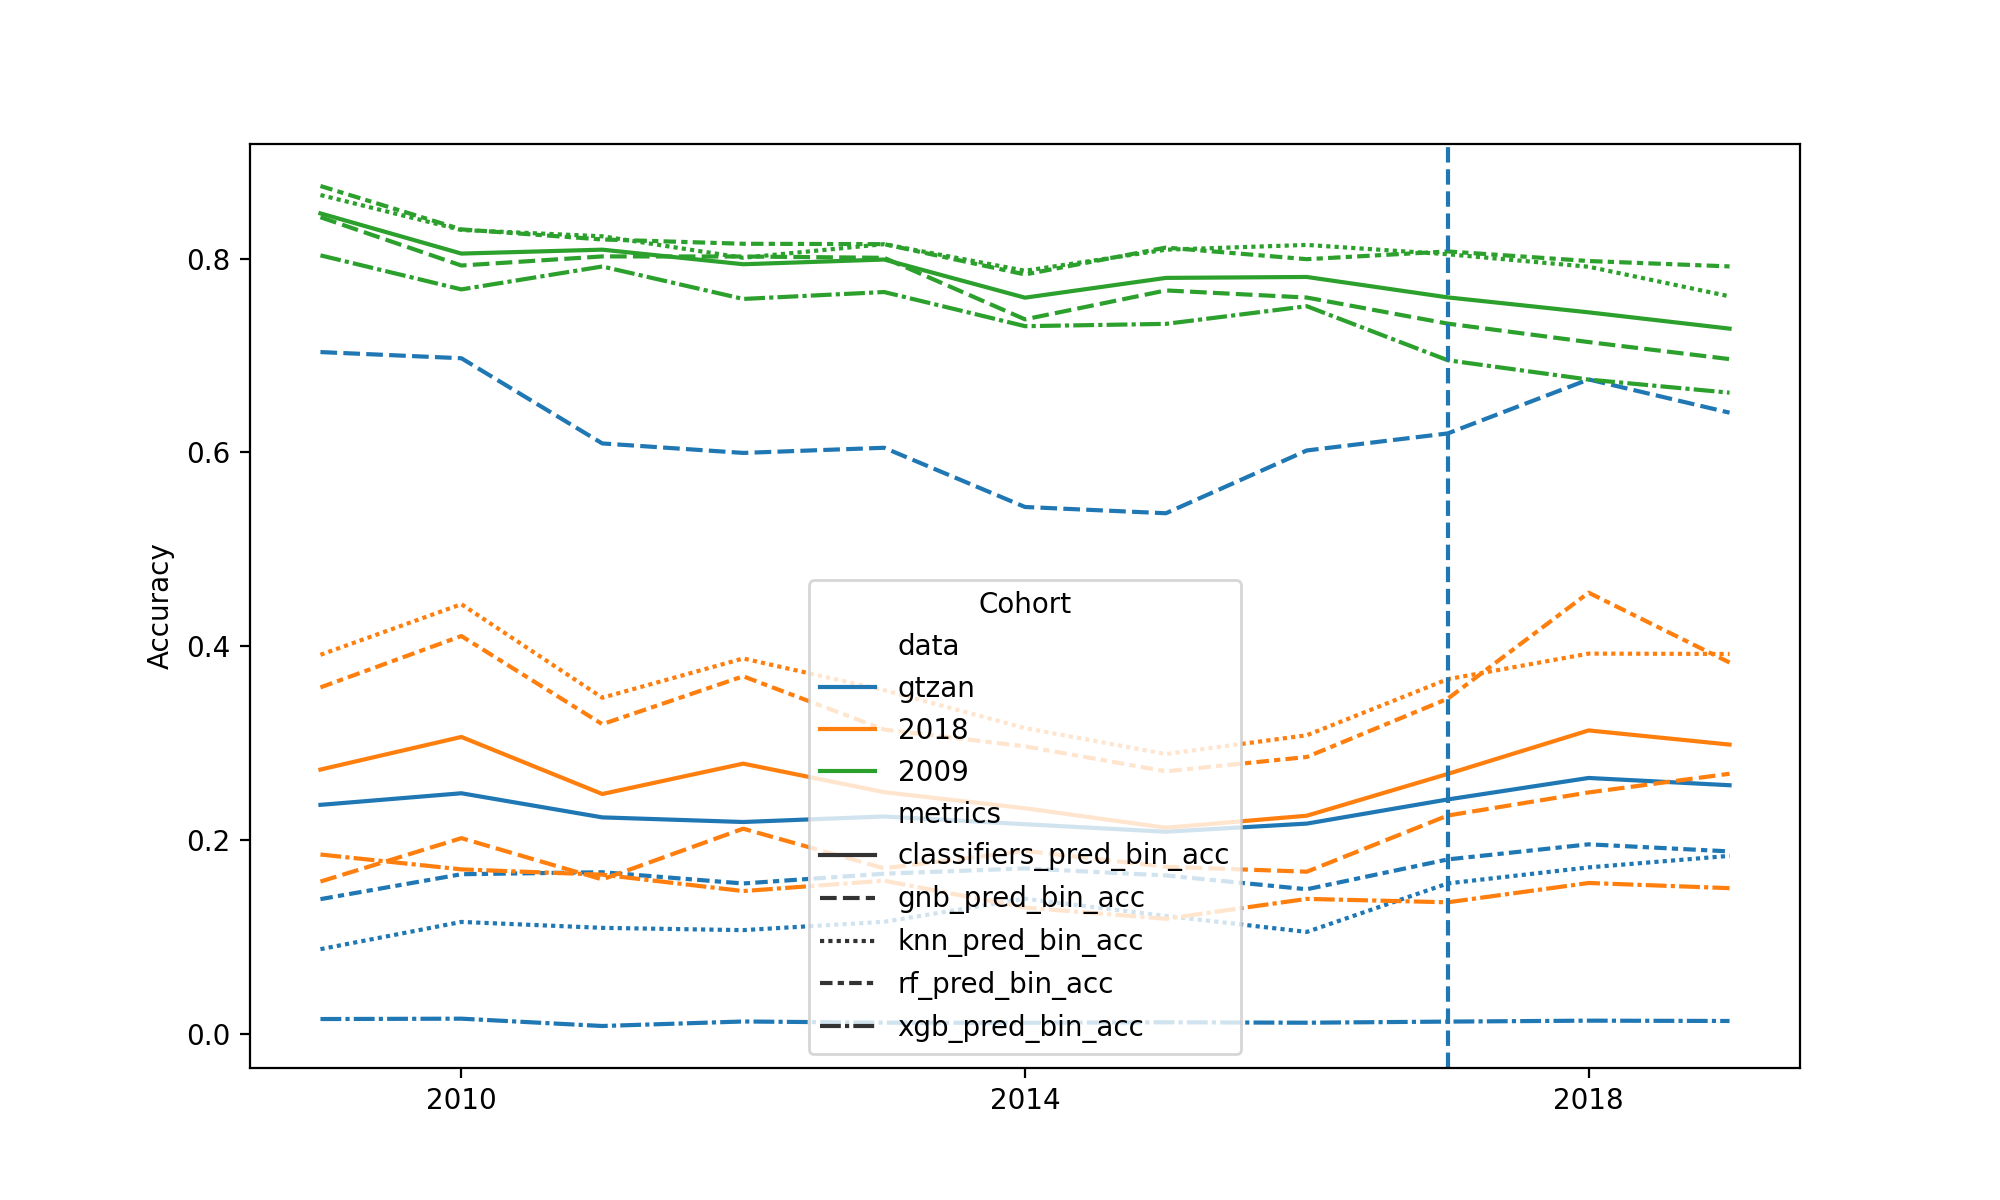

In [ ]:
# accuracy
plot_accuracy = merge[merge['metrics'].str.contains("pred_bin_acc") == True]
display(plot_accuracy)

plot_accuracy = plot_accuracy[plot_accuracy['data'].isin(["2009","2018","gtzan"])]
display(plot_accuracy)
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_accuracy, x='release_year', y='values', hue='data', style='metrics')
plt.axvline(x=2017, linestyle='dashed')
plt.xlabel('')
plt.ylabel('Accuracy')
plt.xticks(range(2010, 2019, 4))
plt.legend(title='Cohort', loc='lower center')
plt.show()

,src,level_1,release_year,treatment_year,metrics,values,classifier,data,folk,hiphop,pop,rock,sum,folk_prop,hiphop_prop,pop_prop,rock_prop,hiphop_prop_GTZAN,pop_prop_GTZAN,rock_prop_GTZAN
1,classifiers_metrics_gtzan,11,2009,1,classifiers_pred_bin_acc,0.236486,classifiers,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
5,gnb_metrics_gtzan,11,2009,1,gnb_pred_bin_acc,0.703522,gnb,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
9,knn_metrics_gtzan,11,2009,1,knn_pred_bin_acc,0.087633,knn,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
13,rf_metrics_gtzan,11,2009,1,rf_pred_bin_acc,0.139230,rf,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
17,xgb_metrics_gtzan,11,2009,1,xgb_pred_bin_acc,0.015561,xgb,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,knn_metrics_2018,21,2019,0,knn_pred_bin_acc,0.392153,knn,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
645,rf_metrics_2009,21,2019,0,rf_pred_bin_acc,0.791874,rf,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
649,classifiers_metrics_2009,21,2019,0,classifiers_pred_bin_acc,0.727694,classifiers,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
653,gnb_metrics_2018,21,2019,0,gnb_pred_bin_acc,0.268572,gnb,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873


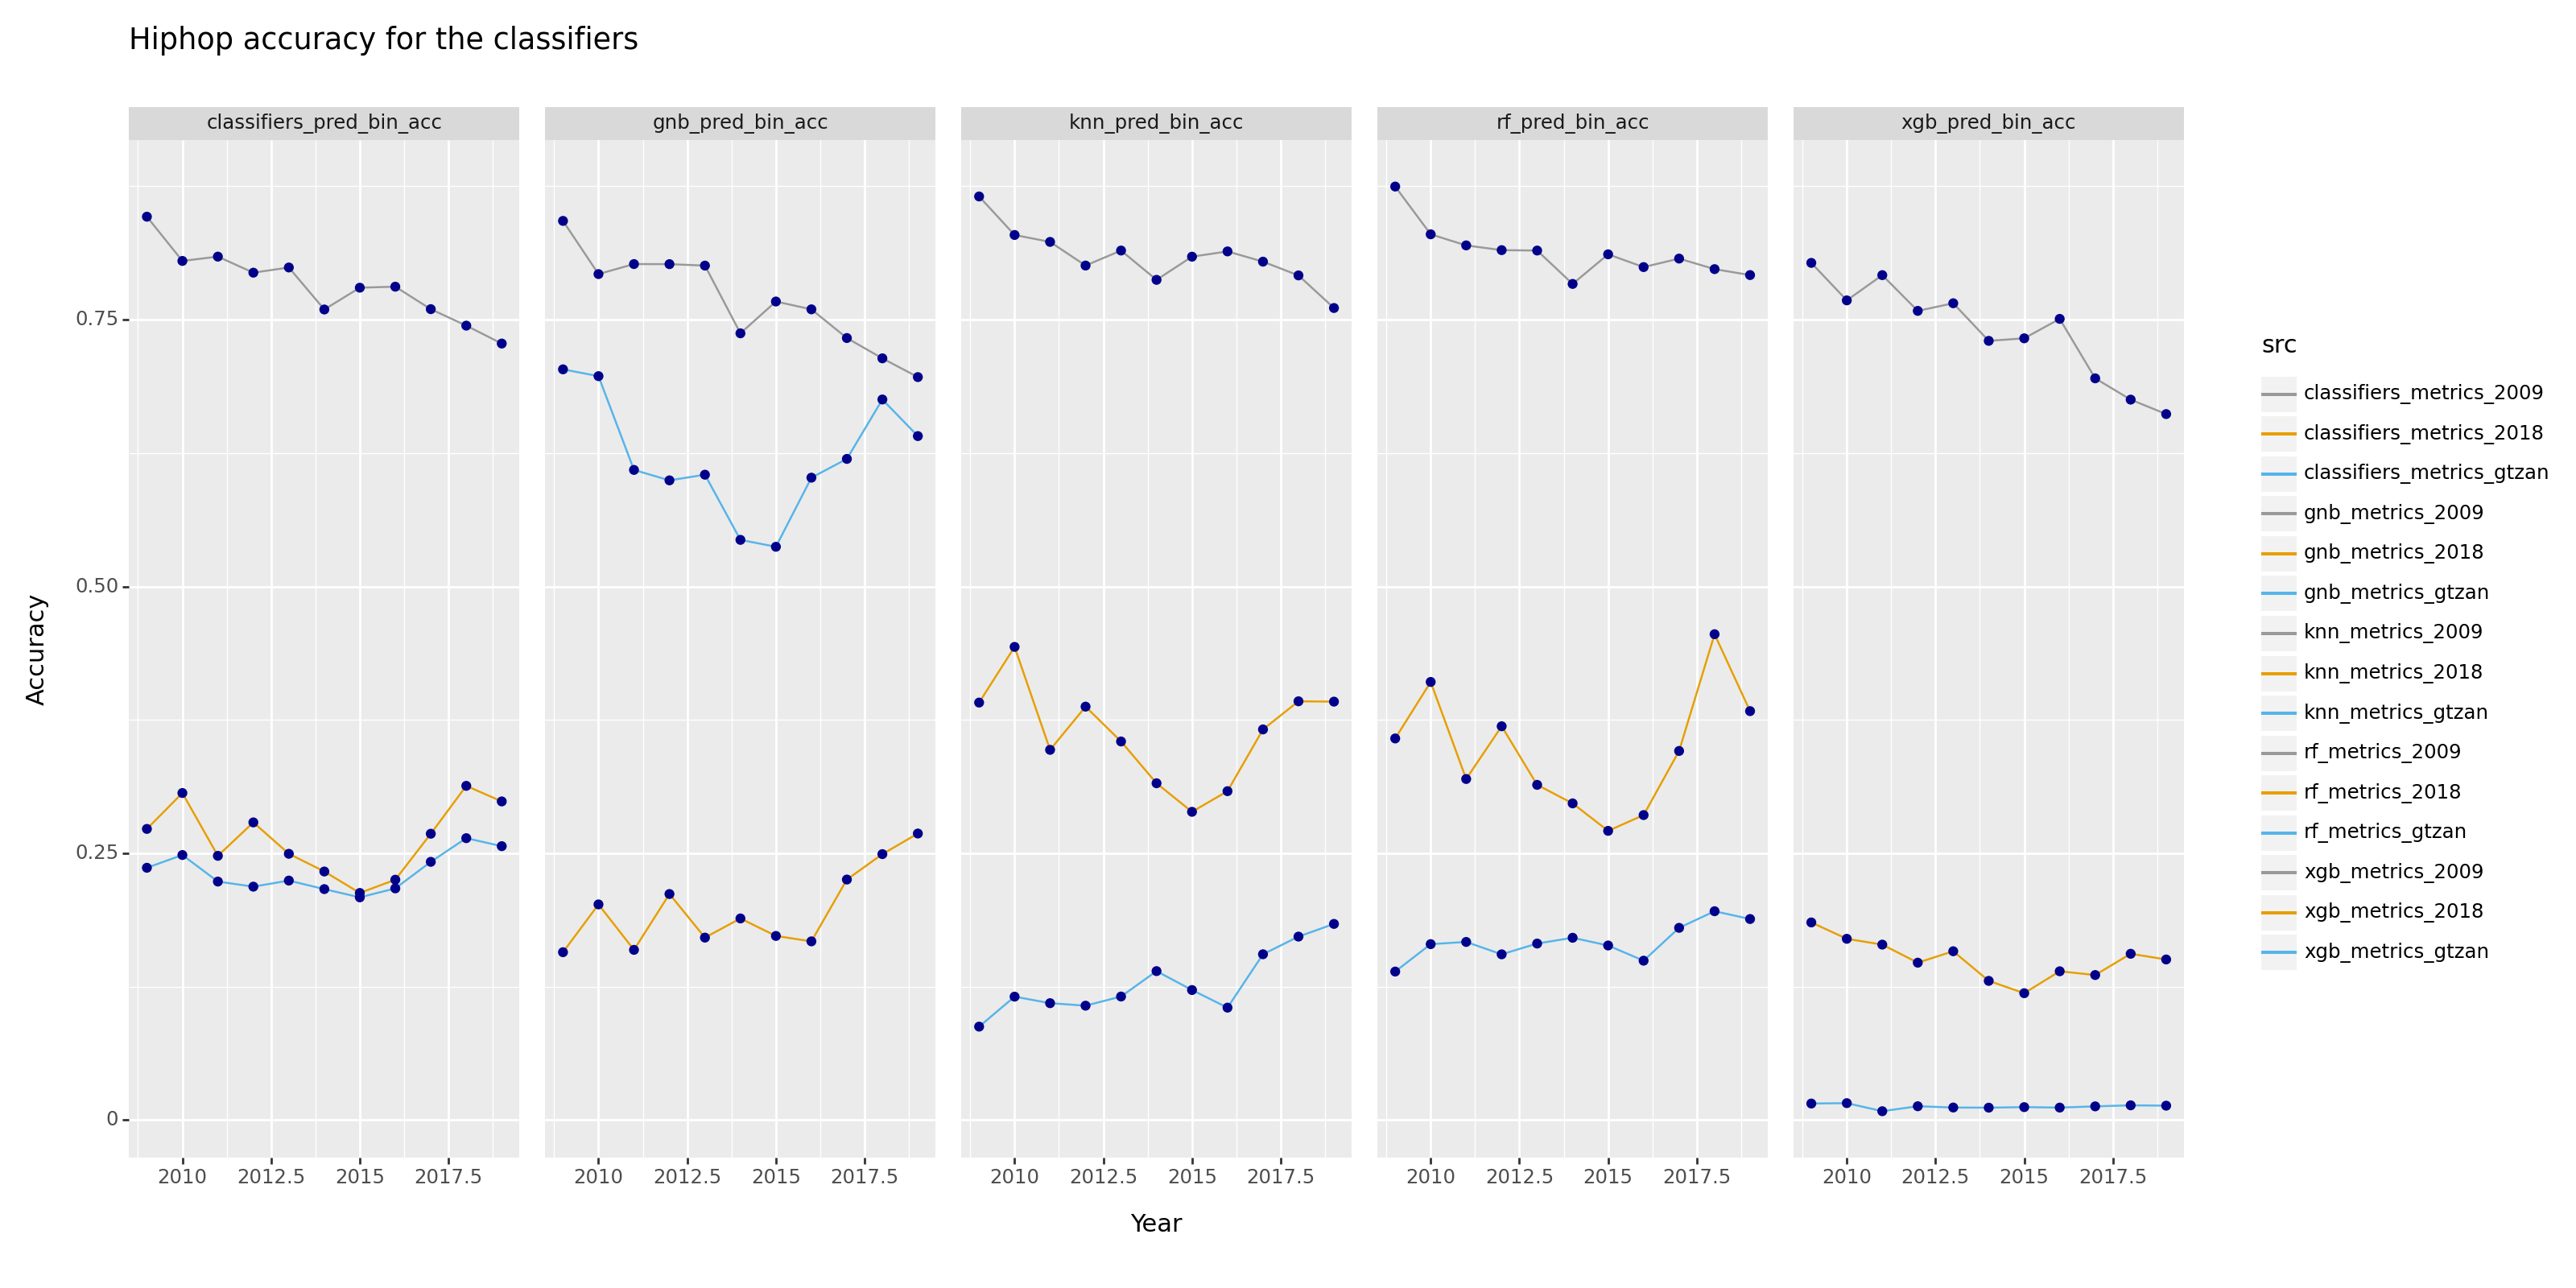

<Figure Size: (1600 x 800)>

In [ ]:
from plotnine import ggplot, aes, facet_grid, labs, geom_point, theme_dark, geom_line, theme, scale_color_manual

#plot_accuracy = plot_accuracy[plot_accuracy['data'].isin(["2009"])]
display(plot_accuracy)
(
    ggplot(plot_accuracy)
    + facet_grid('. ~ metrics')
    + aes(x="release_year", y="values", color='src')
    + labs(
        x="Year",
        y="Accuracy",
        title="Hiphop accuracy for the classifiers",
    )
    + geom_line()# aes(linetype = 'release_year')
    + scale_color_manual(values=["#999999","#E69F00","#56B4E9","#999999","#E69F00","#56B4E9", "#999999","#E69F00","#56B4E9", "#999999","#E69F00","#56B4E9", "#999999","#E69F00","#56B4E9"])## , "#56B4E9"
    + geom_point(color='darkblue')
    + theme(figure_size=(16, 8))
)

,src,level_1,release_year,treatment_year,metrics,values,classifier,data,folk,hiphop,pop,rock,sum,folk_prop,hiphop_prop,pop_prop,rock_prop,hiphop_prop_GTZAN,pop_prop_GTZAN,rock_prop_GTZAN
2,classifiers_metrics_gtzan,22,2009,1,classifiers_recall,0.421296,classifiers,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
6,gnb_metrics_gtzan,22,2009,1,gnb_recall,0.500000,gnb,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
10,knn_metrics_gtzan,22,2009,1,knn_recall,0.611111,knn,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
14,rf_metrics_gtzan,22,2009,1,rf_recall,0.500000,rf,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
18,xgb_metrics_gtzan,22,2009,1,xgb_recall,0.074074,xgb,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,knn_metrics_2018,32,2019,0,knn_recall,0.735057,knn,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
646,rf_metrics_2009,32,2019,0,rf_recall,0.620602,rf,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
650,classifiers_metrics_2009,32,2019,0,classifiers_recall,0.370920,classifiers,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
654,gnb_metrics_2018,32,2019,0,gnb_recall,0.744807,gnb,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873


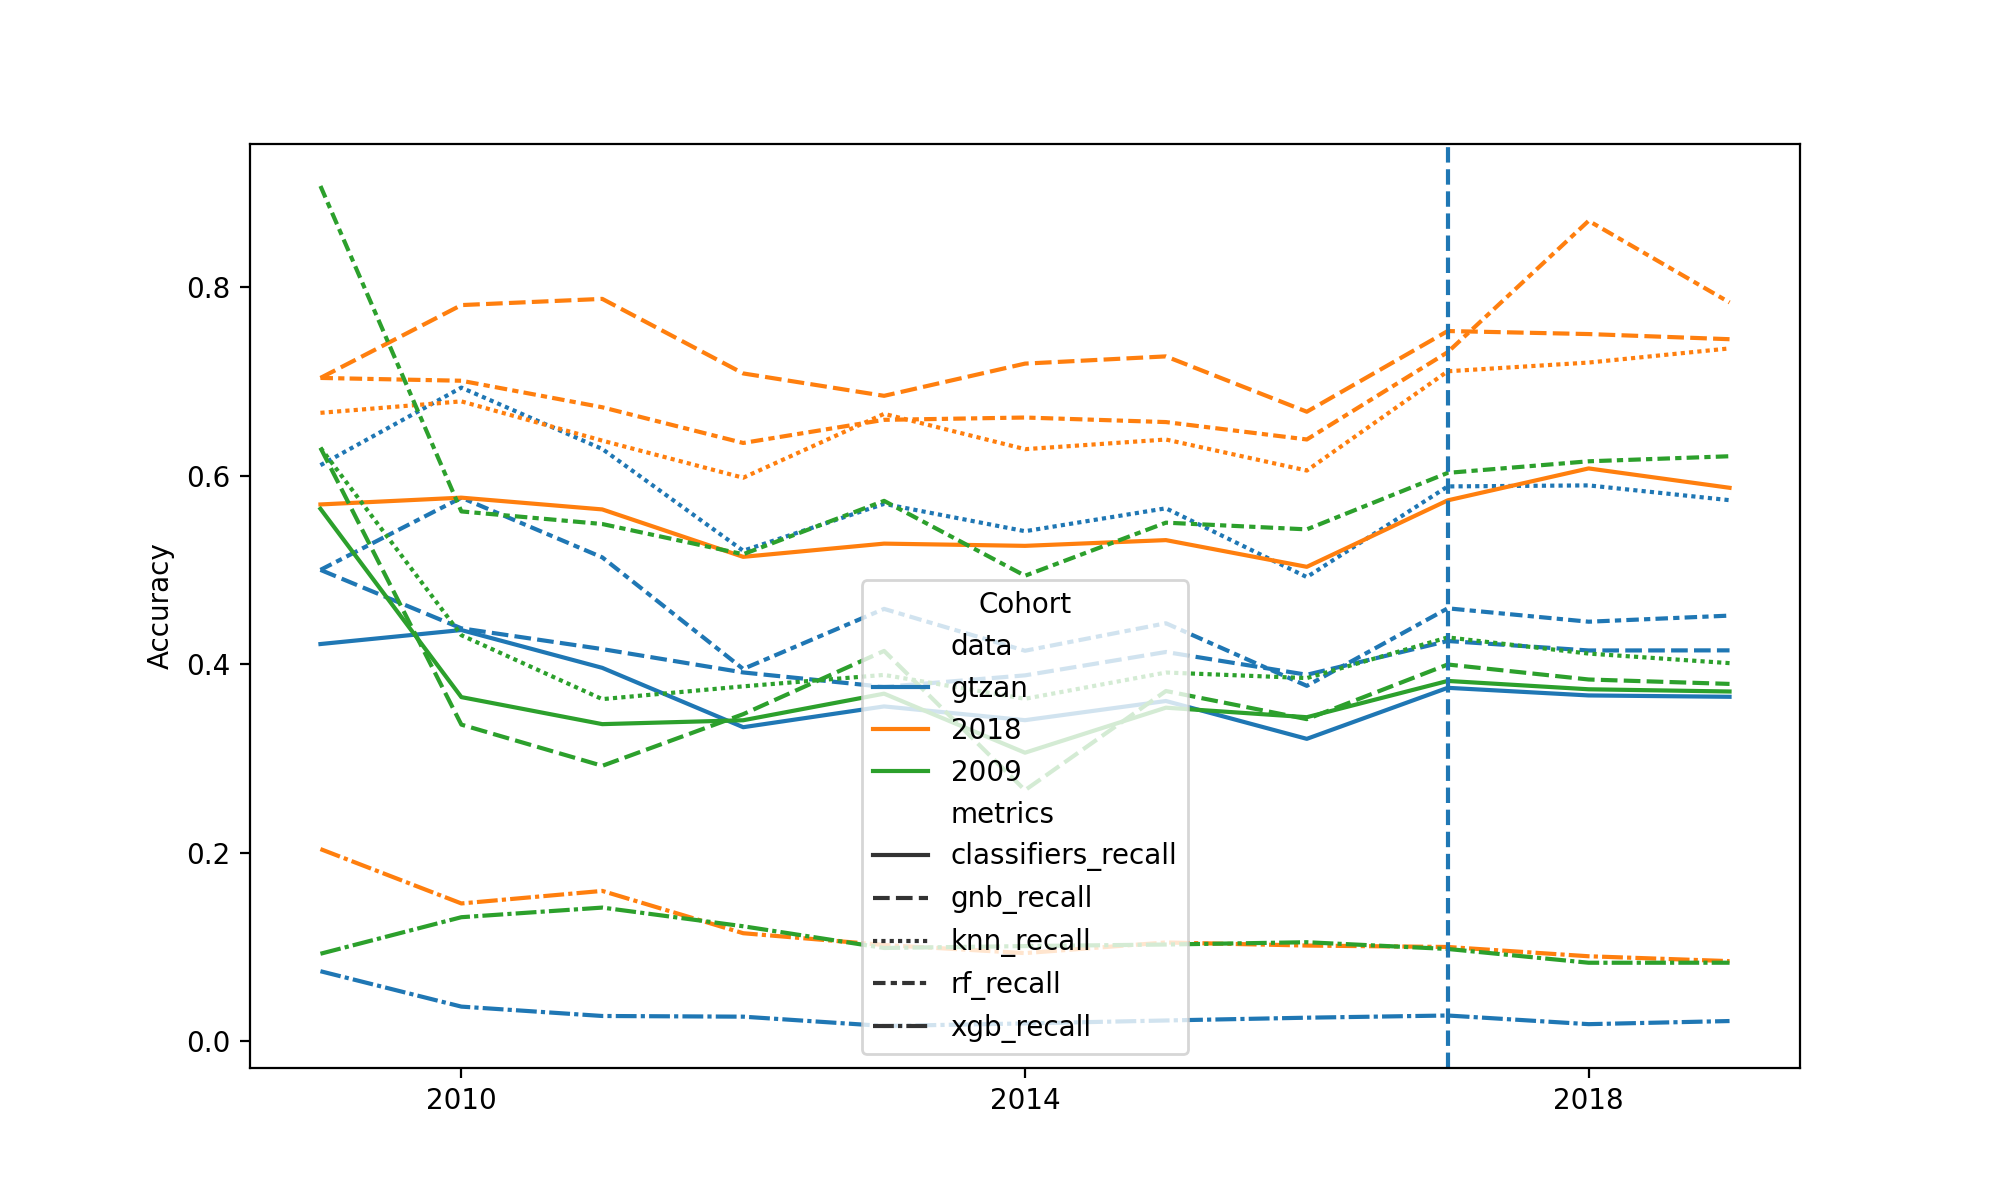

In [ ]:
# recall
plot_recall = merge[merge['metrics'].str.contains("recall") == True]
plot_recall = plot_recall[plot_recall['data'].isin(["2009","2018","gtzan"])]
display(plot_recall)

plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_recall, x='release_year', y='values', hue='data', style='metrics')
plt.axvline(x=2017, linestyle='dashed')
plt.xlabel('')
plt.ylabel('Accuracy')
plt.xticks(range(2010, 2019, 4))
plt.legend(title='Cohort', loc='lower center')
plt.show()

,src,level_1,release_year,treatment_year,metrics,values,classifier,data,folk,hiphop,pop,rock,sum,folk_prop,hiphop_prop,pop_prop,rock_prop,hiphop_prop_GTZAN,pop_prop_GTZAN,rock_prop_GTZAN
2,classifiers_metrics_gtzan,22,2009,1,classifiers_recall,0.421296,classifiers,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
6,gnb_metrics_gtzan,22,2009,1,gnb_recall,0.500000,gnb,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
10,knn_metrics_gtzan,22,2009,1,knn_recall,0.611111,knn,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
14,rf_metrics_gtzan,22,2009,1,rf_recall,0.500000,rf,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
18,xgb_metrics_gtzan,22,2009,1,xgb_recall,0.074074,xgb,gtzan,177,54,963,204,1398,0.126609,0.038627,0.688841,0.145923,0.044226,0.788698,0.167076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,knn_metrics_2018,32,2019,0,knn_recall,0.735057,knn,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
646,rf_metrics_2009,32,2019,0,rf_recall,0.620602,rf,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
650,classifiers_metrics_2009,32,2019,0,classifiers_recall,0.370920,classifiers,2009,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873
654,gnb_metrics_2018,32,2019,0,gnb_recall,0.744807,gnb,2018,900,2359,5486,1297,10042,0.089624,0.234913,0.546306,0.129158,0.258040,0.600088,0.141873


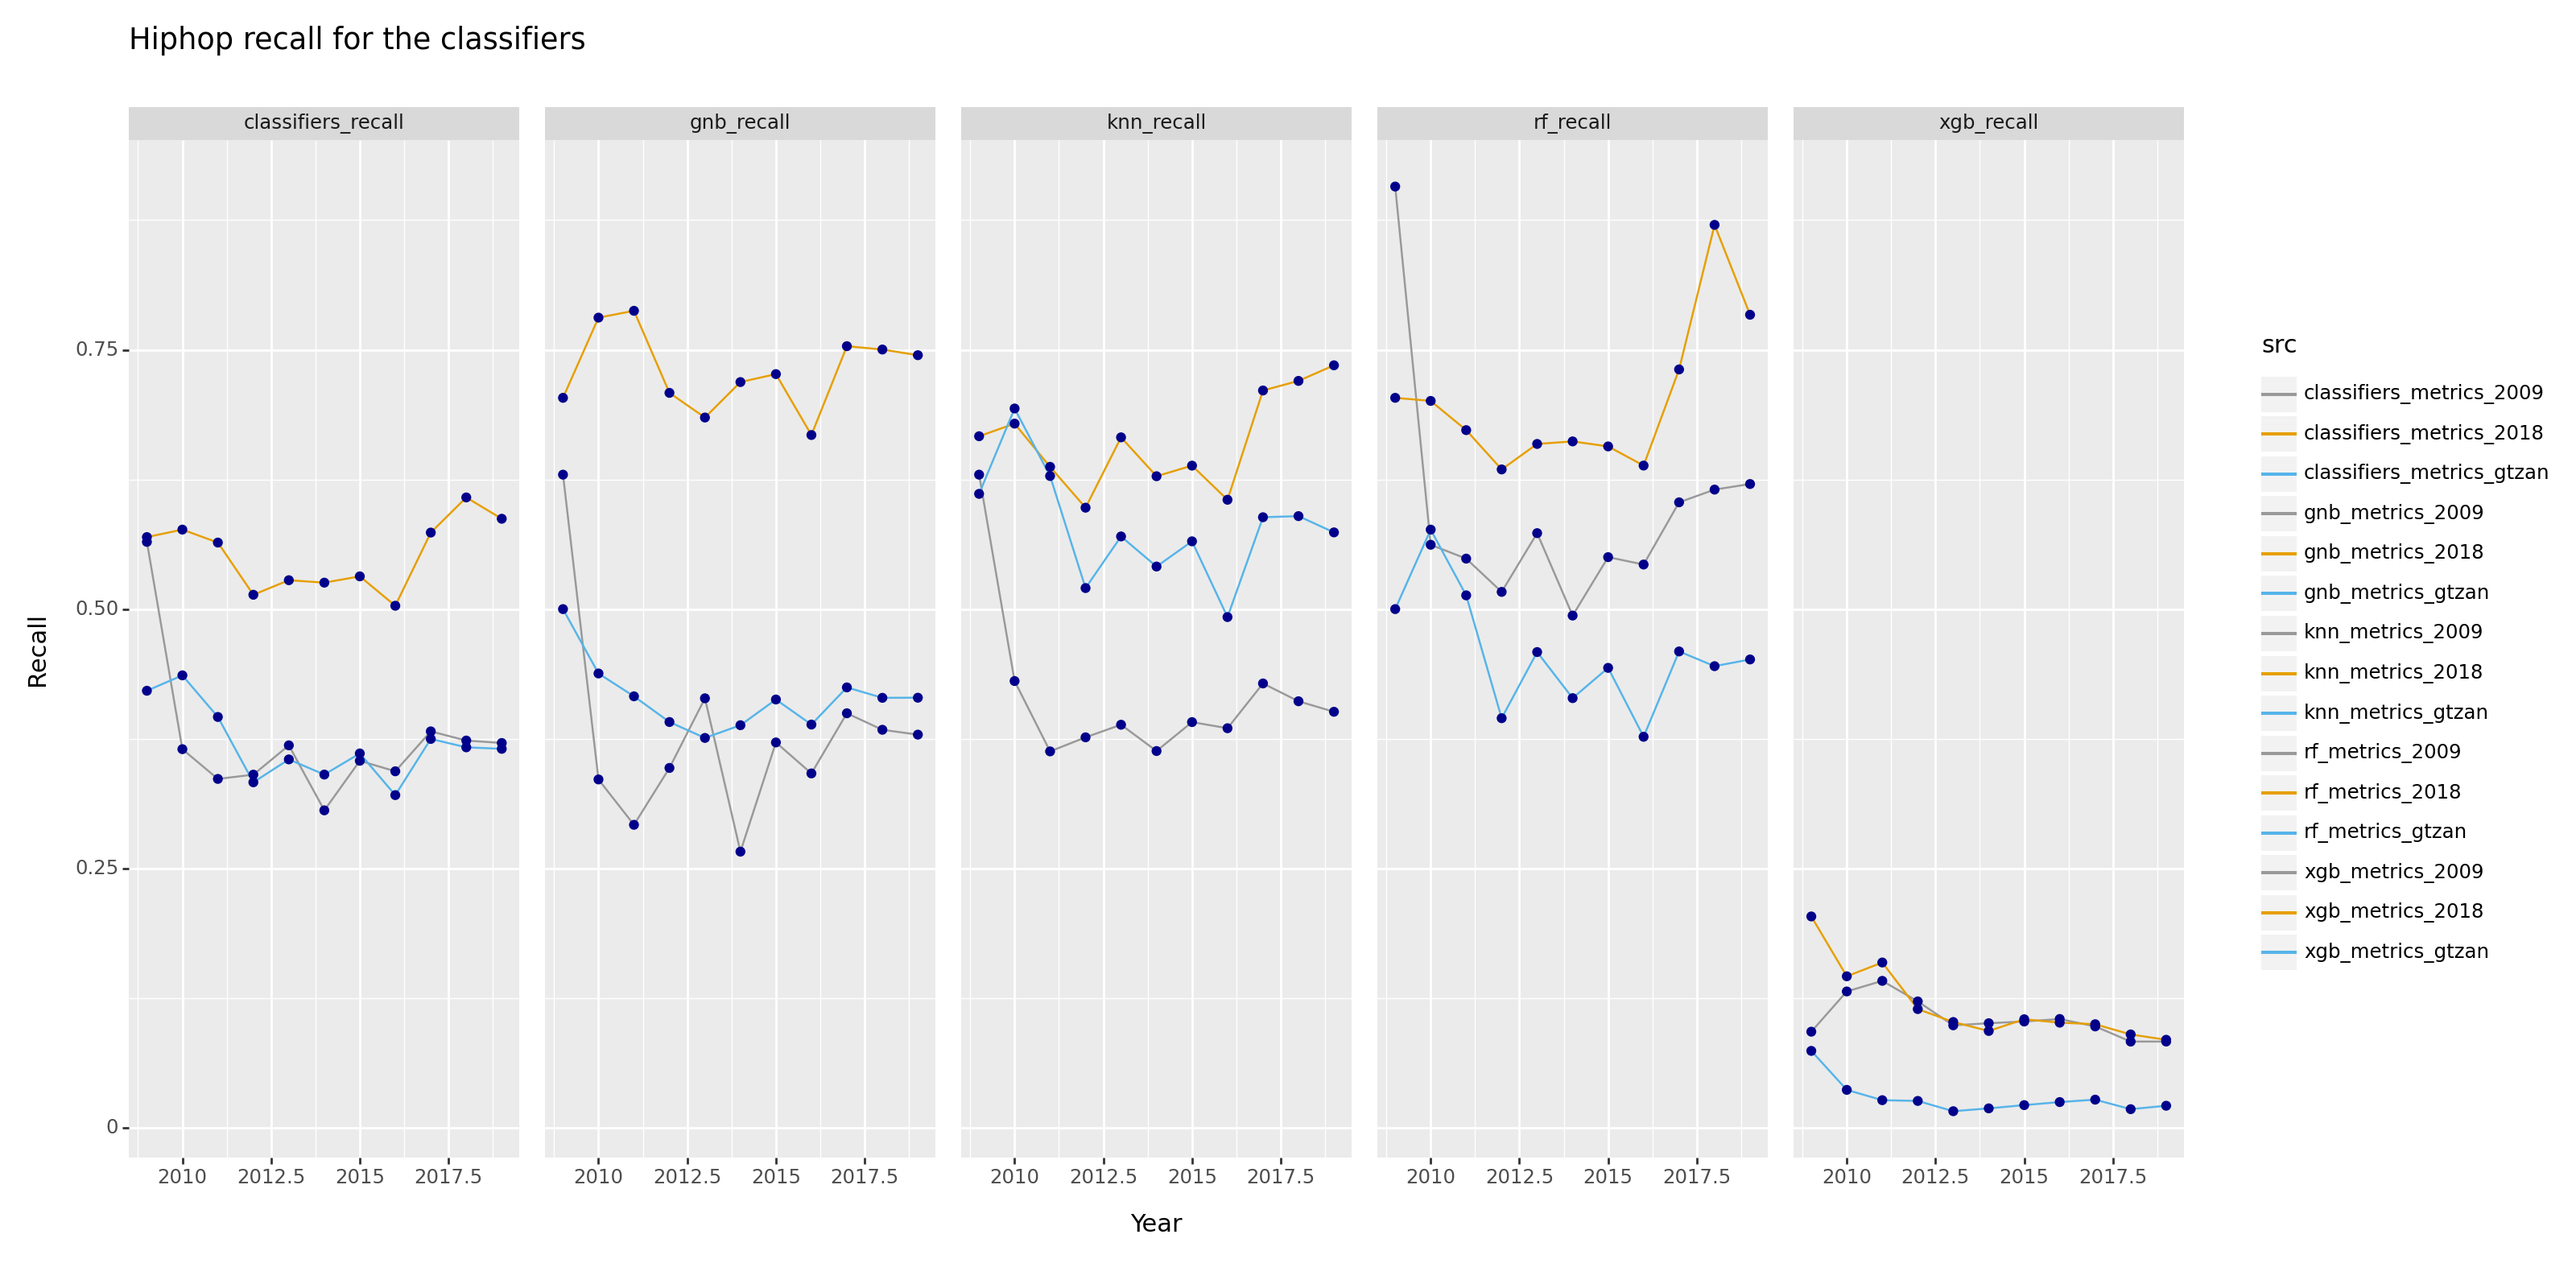

<Figure Size: (1600 x 800)>

In [ ]:
from plotnine import ggplot, aes, facet_grid, labs, geom_point, theme_dark, geom_line, theme, scale_color_manual

#plot_accuracy = plot_accuracy[plot_accuracy['data'].isin(["2009"])]
display(plot_recall)
(
    ggplot(plot_recall)
    + facet_grid('. ~ metrics')
    + aes(x="release_year", y="values", color='src')
    + labs(
        x="Year",
        y="Recall",
        title="Hiphop recall for the classifiers",
    )
    + geom_line()# aes(linetype = 'release_year')
    + scale_color_manual(values=["#999999","#E69F00","#56B4E9","#999999","#E69F00","#56B4E9", "#999999","#E69F00","#56B4E9", "#999999","#E69F00","#56B4E9", "#999999","#E69F00","#56B4E9"])# , "#56B4E9"
    + geom_point(color='darkblue')
    + theme(figure_size=(16, 8))
)
